In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

In [3]:
ctf = [transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip()]

# Load dataset
train_loader = FromPublic('cifar10', 'train', batch_size=512, num_workers=4, custom_tf=ctf)
test_loader = FromPublic('cifar10', 'test', batch_size=512, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Model
model = SENet18(input_dim=3)

# Learning
runner = Runner(model, train_loader, test_loader, optimizer='adam', loss_fn='focal')

In [5]:
for _ in range(3): runner.fit_onecycle(1e-3, mixup_alpha=0.4)

0.36305157775878905
0.5733

Test set: Average loss: 1.5433



0.5018535565185547
0.6811

Test set: Average loss: 1.1292



0.581613032836914
0.7305

Test set: Average loss: 0.9205



In [6]:
runner.fit_cycle(5, 1e-3, mixup_alpha=0.4)

0.6195863989257813
0.7707

Test set: Average loss: 0.8434


0.6421138293457032
0.7754

Test set: Average loss: 0.7922


0.6747478646850585
0.8229

Test set: Average loss: 0.6241


0.666168112487793
0.7839

Test set: Average loss: 0.7822


0.7376507965087891
0.8321

Test set: Average loss: 0.6564


0.7651731335449219
0.8642

Test set: Average loss: 0.4777


0.6966806311035156
0.8083

Test set: Average loss: 0.7165


0.7155397628784179
0.817

Test set: Average loss: 0.6796


0.7451746609497071
0.8597

Test set: Average loss: 0.5018


0.7727890908813476
0.8803

Test set: Average loss: 0.4206


0.7079092309570313
0.8404

Test set: Average loss: 0.5769


0.7287271780395508
0.8551

Test set: Average loss: 0.5288


0.7505473956298828
0.8658

Test set: Average loss: 0.4935


0.7844931671142578
0.8872

Test set: Average loss: 0.3904


0.7741253112792968
0.8972

Test set: Average loss: 0.3775



In [7]:
runner.validate()

0.8972

Test set: Average loss: 0.3782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


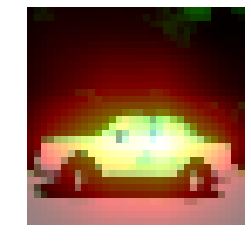

In [135]:
x, y = next(iter(test_loader))
x, y = x[None, 1], y[None, 1]
vx = Variable(x.cuda())
runner.cam(vx, -3, 512, 10)